#### problem 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

 these are multiple product catogories -Fresh milk ,Grocery , etc . The values represent the no. of units 
 purchased by each client for each product

In [2]:
data= pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
scaler =MinMaxScaler()
scaled_data= pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


 Dendrogram to decide the no of clisters

In [4]:
# import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

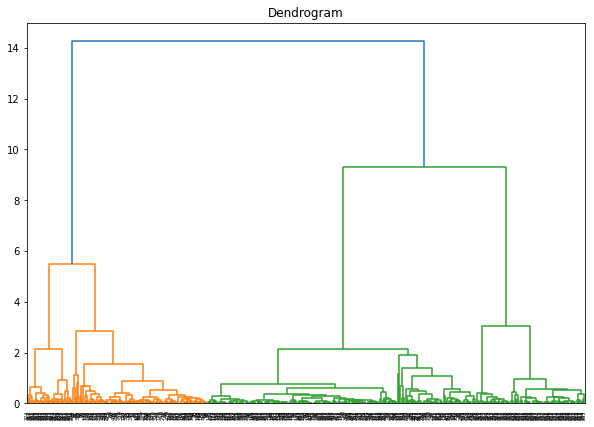

In [5]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
# the linkage criterion determines which distance to use btw setsm of observation.
# the algorithm will merge the pairs of cluster that minimize the criterion
# methos used for determining the distance btw newly formed  cluster and 
# the other datapoints -- single , complete ,average etc

# method ='Ward' uses the ward variance minimization algorithm
dend= dendrogram(linkage(scaled_data, method='ward'))

 'ward' minimizes the variance of the clustering being merged
 
 'average' uses the average of the distances of each observation of tge two sets
 
 'complete' or 'maximum' linkage uses the maximum distances btw all observations of the two sets
 
 'single' uses the minimum of the distances btw all observations of the two sets

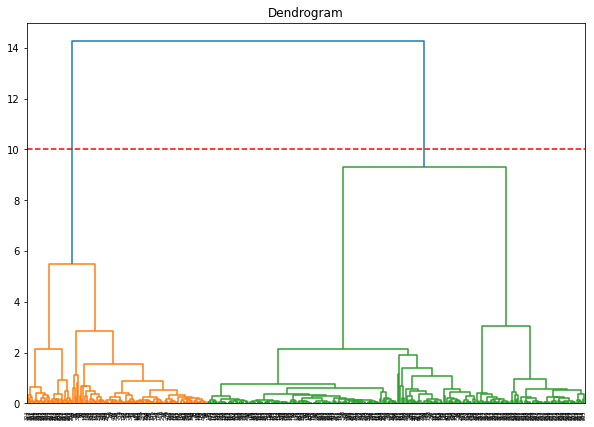

In [6]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
# dend= shc.dendrogram(shc.linkage(scaled_data, method='ward')
dend= dendrogram(linkage(scaled_data, method='ward'))
plt.axhline(y=10, color='r', linestyle='--')

In [7]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters= 2, linkage='ward')

In [8]:
clusters= model.fit_predict(scaled_data)
clusters

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

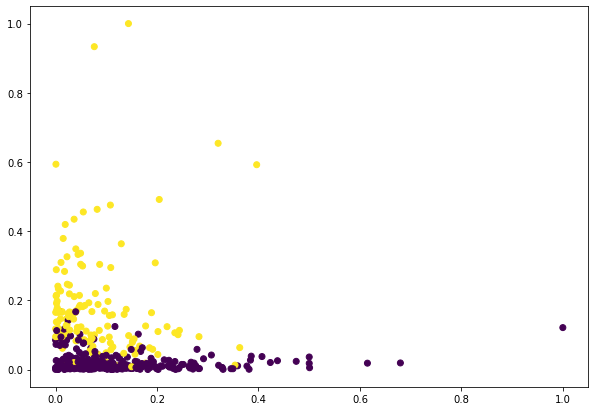

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_data['Fresh'], scaled_data['Detergents_Paper'], c=clusters)

In [10]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters= 3, linkage='ward')

In [11]:
clusters= model.fit_predict(scaled_data)
clusters

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1, 0,

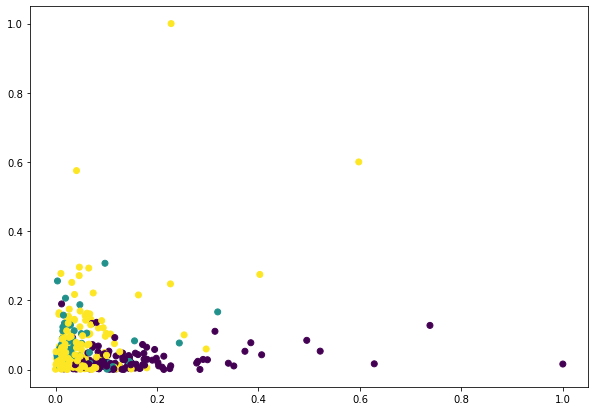

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_data['Milk'], scaled_data['Frozen'], c=clusters)

###### problem 2

In [13]:
data= pd.read_csv('shopping-data.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
data.shape

(200, 5)

In [15]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [16]:
data['Genre']=data['Genre'].map({'Male':0 , 'Female':1})

In [17]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [18]:
scaler=MinMaxScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
scaled_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.0,0.019231,0.000000,0.387755
1,0.005025,0.0,0.057692,0.000000,0.816327
2,0.010050,1.0,0.038462,0.008197,0.051020
3,0.015075,1.0,0.096154,0.008197,0.775510
4,0.020101,1.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,1.0,0.326923,0.860656,0.795918
196,0.984925,1.0,0.519231,0.909836,0.275510
197,0.989950,0.0,0.269231,0.909836,0.744898
198,0.994975,0.0,0.269231,1.000000,0.173469


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

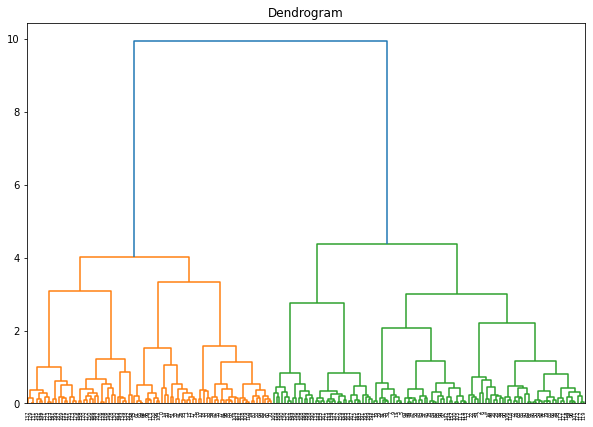

In [20]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=dendrogram(linkage(scaled_data, method='ward'))

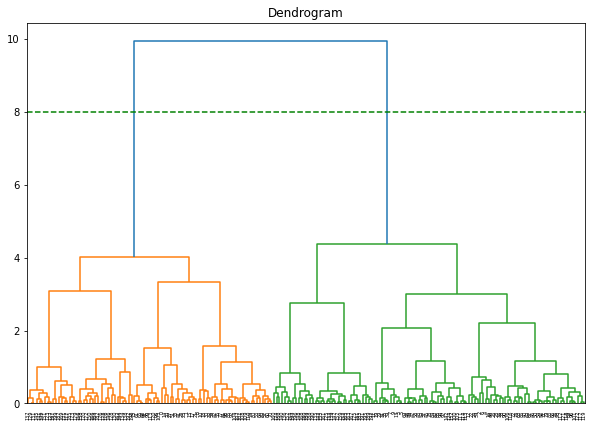

In [21]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend= dendrogram(linkage(scaled_data, method='ward'))
plt.axhline(y=8, color='g', linestyle='--')

In [22]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters= 2, linkage='ward')

In [23]:
clusters=model.fit_predict(scaled_data)
clusters

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

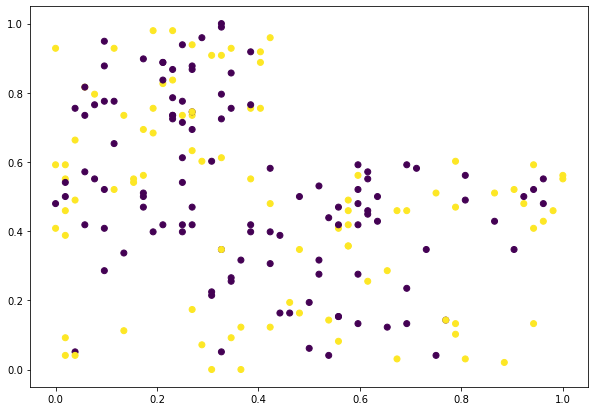

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_data['Age'], scaled_data['Spending Score (1-100)'], c=clusters)

In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters= 3, linkage='ward')

In [26]:
clusters=model.fit_predict(scaled_data)
clusters

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0], dtype=int64)

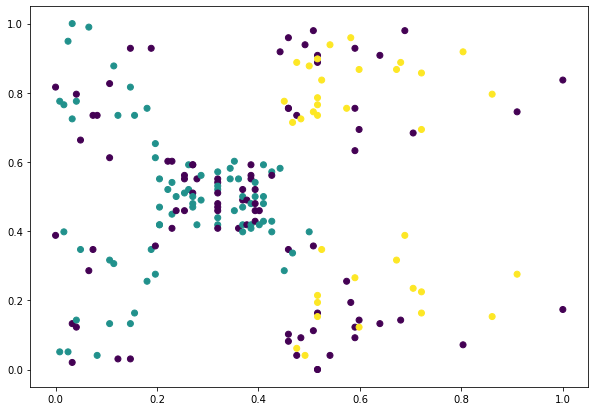

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(scaled_data['Annual Income (k$)'], scaled_data['Spending Score (1-100)'], c=clusters)

In [ ]:
# iris data set